In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<font size = 5>
Import dataset

In [11]:
OOB = pd.read_csv('/Users/yangzhiyuan/Desktop/Data_Think/BBB/Data/OutOfBusiness.csv')
Maindata = pd.read_csv('/Users/yangzhiyuan/Desktop/Data_Think/BBB/Data/Main_BusinessDataBBB_02022024.csv')

<font size = 5>
Merge OOB with Main Dataset

In [29]:
OOB_merged = pd.merge(OOB, Maindata, on='Business ID', how='left')
GA_data = OOB_merged[OOB_merged['State'] == 'GA']
GA_data.to_csv('GA_merged_OOB.csv', index=False)

<font size = 5>
Get Basic Info

In [26]:
print(GA_data.info())
print(GA_data.describe())
print(GA_data.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7675 entries, 0 to 7714
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Business ID           7675 non-null   int64  
 1   Business_x            7675 non-null   object 
 2   Accredited            7675 non-null   object 
 3   Status                7675 non-null   object 
 4   Date Status Set       7675 non-null   object 
 5   OOB Date              7219 non-null   object 
 6   Inquiries this Month  7675 non-null   int64  
 7   Complaints YTD        7675 non-null   int64  
 8   Active?               7675 non-null   bool   
 9   CIBR?                 7675 non-null   bool   
 10  Business_y            7675 non-null   object 
 11  AB?                   7675 non-null   bool   
 12  Established           2144 non-null   object 
 13  State Established     7675 non-null   object 
 14  TOB                   7669 non-null   object 
 15  Address              

<font size = 5>
OOB Status

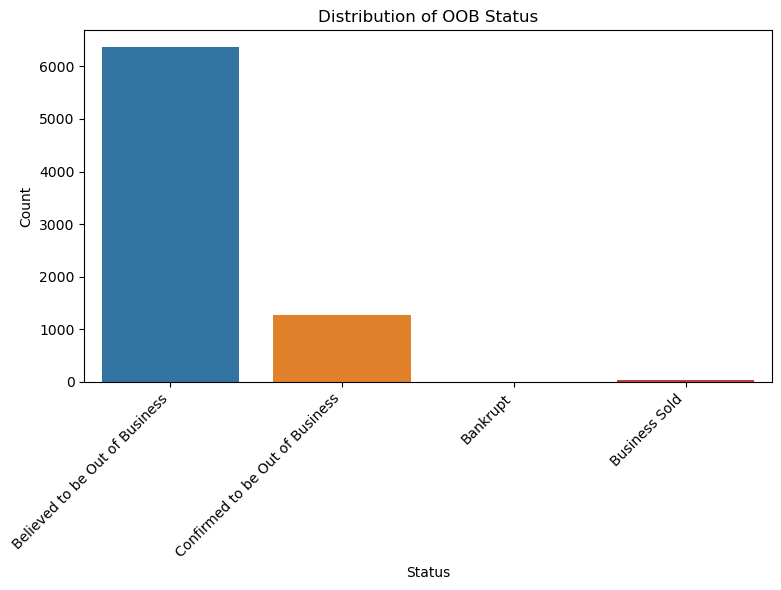

In [50]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=GA_data)
plt.title('Distribution of OOB Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

<font size = 5>
Correlation Matirc

/var/folders/4t/xgsphxbn791_llp8nx06j7j40000gn/T/ipykernel_42177/2699067234.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = GA_data.corr()


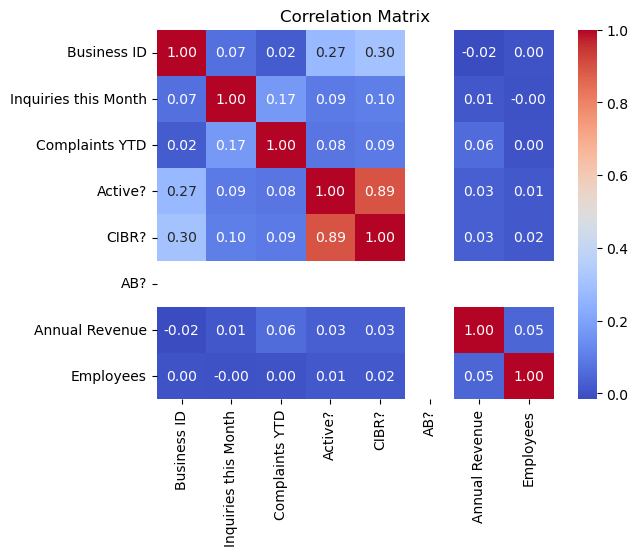

In [27]:
correlation_matrix = GA_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<font size = 5>
Top 10 cities with most OOB

Atlanta          1706
Marietta          467
Alpharetta        276
Lawrenceville     242
Norcross          198
Decatur           179
Cumming           166
Duluth            164
Kennesaw          158
Roswell           155
Name: City, dtype: int64


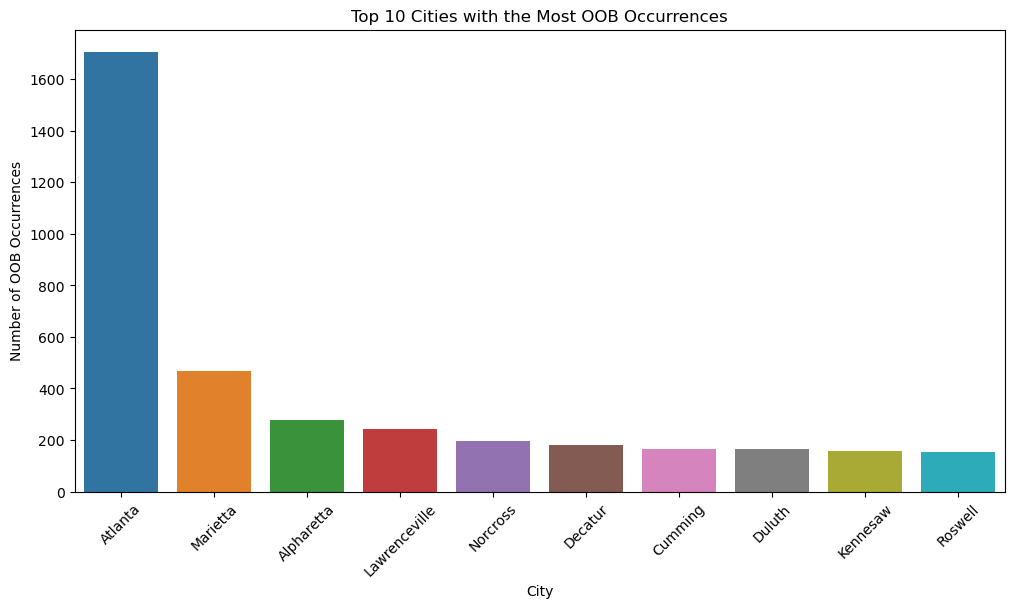

In [28]:
city_counts = GA_data['City'].value_counts()

top_cities = city_counts.head(10)
print(top_cities)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top 10 Cities with the Most OOB Occurrences')
plt.xlabel('City')
plt.ylabel('Number of OOB Occurrences')
plt.xticks(rotation=45)
plt.show()

<font size = 3>
Atlanta has the most out of businesses, but this may due to that Atlanta has the most businesses itself. 

<font size = 5>
Top 10 counties with most OOB

FULTON      1811
GWINNETT    1167
COBB        1045
DEKALB       976
CHEROKEE     292
HENRY        257
CLAYTON      239
FORSYTH      170
FAYETTE      168
DOUGLAS      155
Name: County, dtype: int64


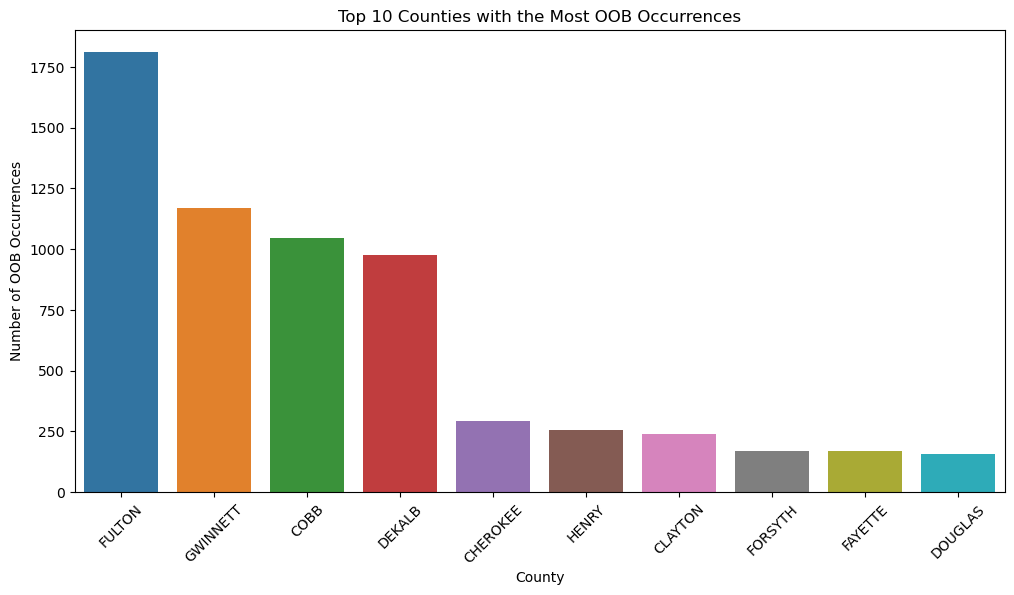

In [30]:
county_counts = GA_data['County'].value_counts()

top_counties = county_counts.head(10)
print(top_counties)

#Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=top_counties.index, y=top_counties.values)
plt.title('Top 10 Counties with the Most OOB Occurrences')
plt.xlabel('County')
plt.ylabel('Number of OOB Occurrences')
plt.xticks(rotation=45)
plt.show()

<font size = 5>
10 Lowest Average Annual Revenue Counties

In [48]:
GA_data = GA_data.dropna(subset=['Annual Revenue'])
average_revenue_by_county = GA_data.groupby('County')['Annual Revenue'].sum() / GA_data.groupby('County')['Business ID'].count()
average_revenue_by_county = average_revenue_by_county.sort_values(ascending=True)
smallest_10_average_revenue = average_revenue_by_county.head(10)
print(smallest_10_average_revenue)

County
LEE                  0.000000
HILLSBOROUGH         0.000000
CHATHAM              0.000000
GILMER           20000.000000
HEARD            47906.500000
LAMAR            58250.000000
ELBERT           59503.142857
HART             76168.000000
PIKE             89812.500000
GLYNN           100000.000000
dtype: float64


<font size = 5>
Overall Comment: 

<font size = 3>
For the Out-Of-Business Data, I am not sure whether they should be included for the analysis. Because since they are already out of business, they probably wouldn't want to be accredited. 
However, the majority status of the "Out-Of business" is "BELIEVED to be Out of Business", so there can be a probability that they are still on business and want to be accredited, but the probablity is quite small in my opinion.

<font size = 5>
Some Problems

<font size = 3>
1. The city names are inconsistent. There are many typos in city names. For example, Atlanta is typed as “Atlanda...."


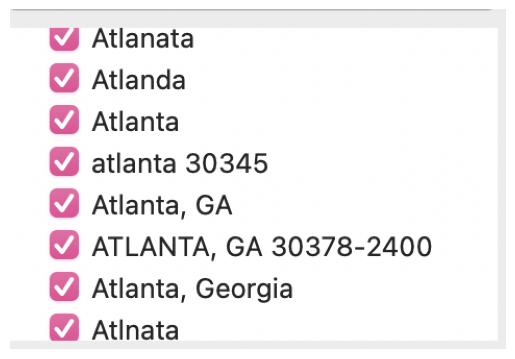

In [54]:
import matplotlib.image as mpimg
image_path = "/Users/yangzhiyuan/Desktop/Atlanta_Typo.png"  # Replace with the actual image file path
img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('off') 
plt.show()

<font size = 3> 
2. We need to normalize the data. But I am not sure whether we are going to use this OOB data. If we are, I will do the normalization. 